In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_ctrUa4K.csv')
train_original = train.copy()

In [2]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
train.shape

(614, 13)

In [5]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

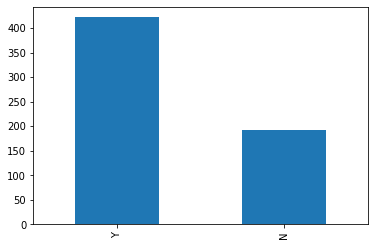

In [7]:
train['Loan_Status'].value_counts().plot.bar()

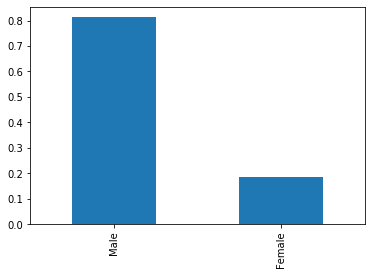

In [8]:
train['Gender'].value_counts(normalize=True).plot.bar()

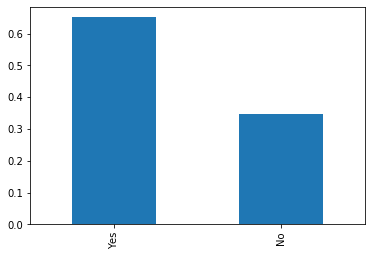

In [9]:
train['Married'].value_counts(normalize=True).plot.bar()

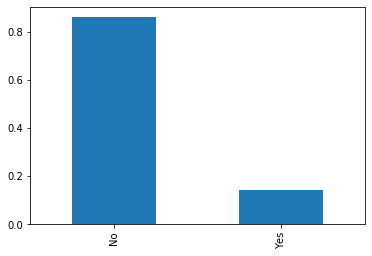

In [10]:
train['Self_Employed'].value_counts(normalize=True).plot.bar()

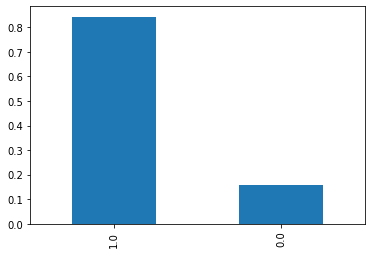

In [11]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

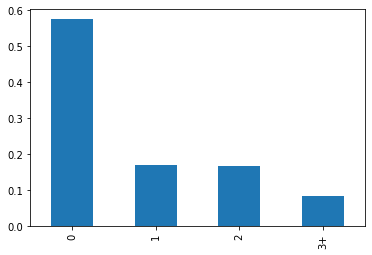

In [12]:
train['Dependents'].value_counts(normalize=True).plot.bar()

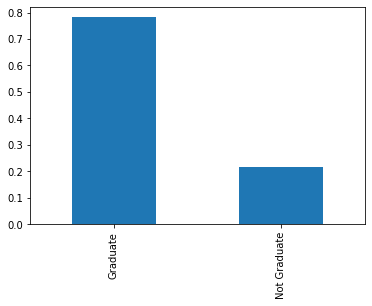

In [13]:
train['Education'].value_counts(normalize=True).plot.bar()

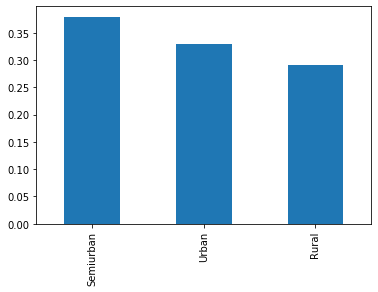

In [14]:
train['Property_Area'].value_counts(normalize=True).plot.bar()

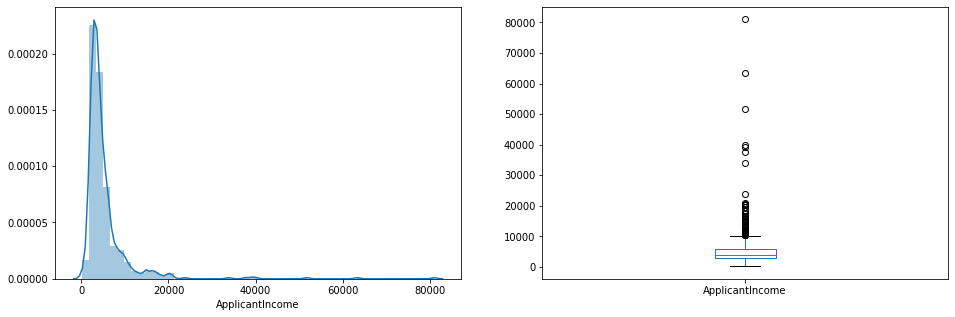

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

Text(0.5, 0.98, '')

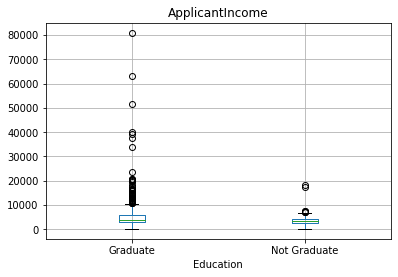

In [16]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

Text(0.5, 0.98, '')

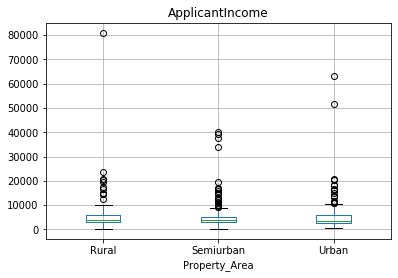

In [17]:
train.boxplot(column='ApplicantIncome', by='Property_Area')
plt.suptitle('')

Text(0.5, 0.98, '')

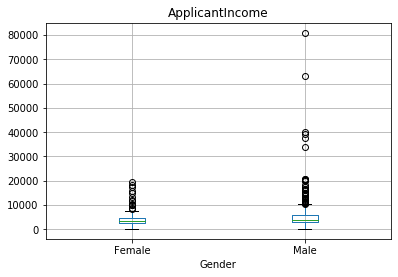

In [18]:
train.boxplot(column='ApplicantIncome', by='Gender')
plt.suptitle('')

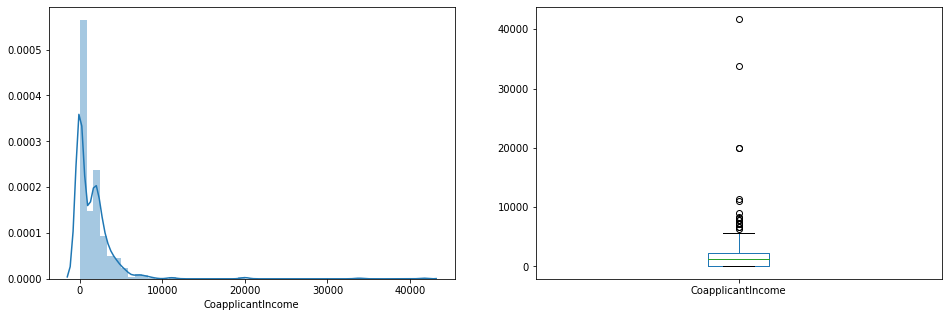

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

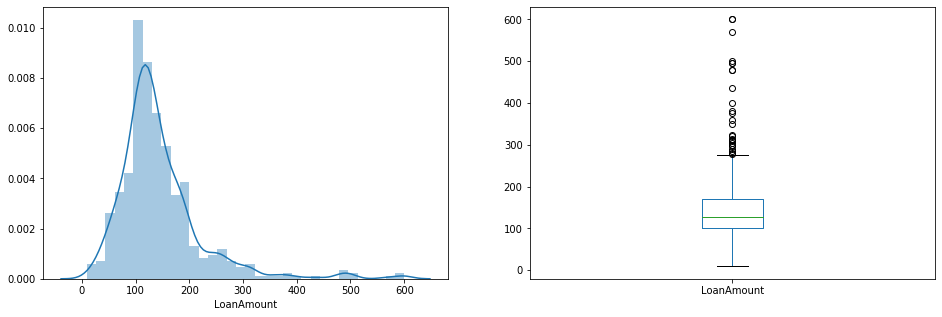

In [20]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

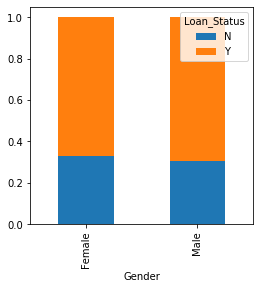

In [21]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize = (4,4))

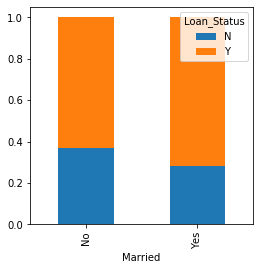

In [22]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (4,4))

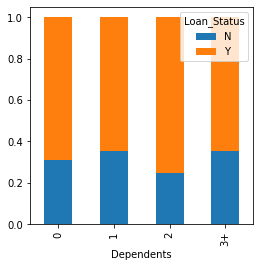

In [23]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (4,4))

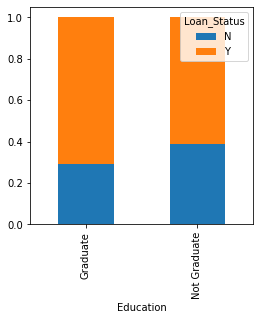

In [24]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

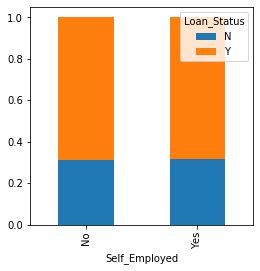

In [25]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

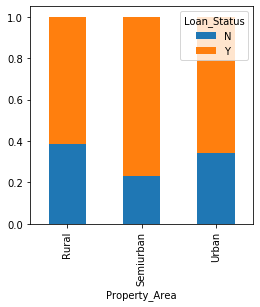

In [26]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

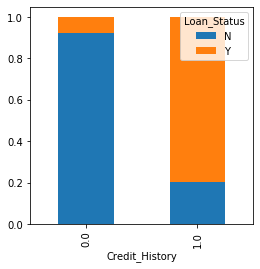

In [27]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

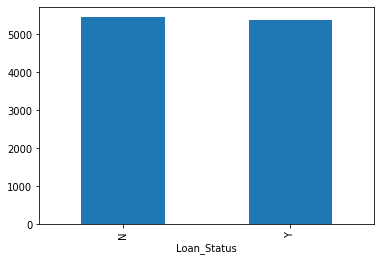

In [28]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

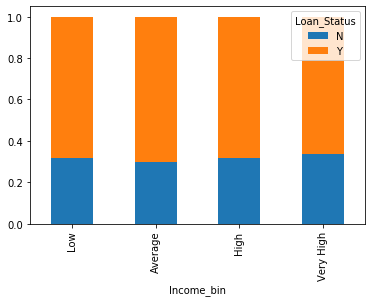

In [29]:
bins=[0, 2500, 4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

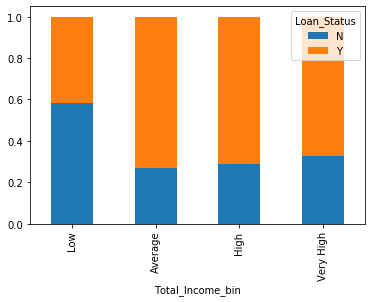

In [30]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins=[0, 2500, 4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [31]:
train = train.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [32]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

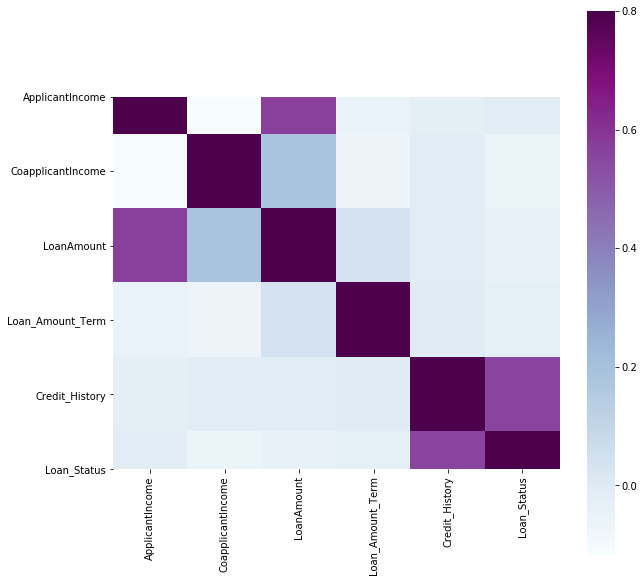

In [33]:
matrix = train.corr()
f, ax =plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')

In [34]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [36]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [39]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
test = pd.read_csv('test_lAUu6dG.csv')

In [42]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

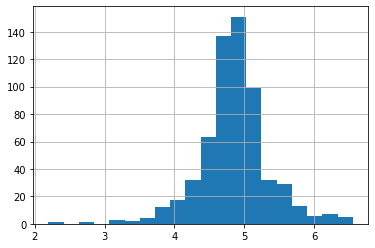

In [43]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [44]:
train = train.drop('Loan_ID',1)

In [45]:
test = test.drop('Loan_ID',1)

In [46]:
X = train.drop('Loan_Status', 1)

In [47]:
y = train.Loan_Status

In [48]:
X = pd.get_dummies(X)

In [49]:
X.shape

(614, 21)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
model = LogisticRegression()

In [54]:
model.fit(x_train, y_train)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
pred_cv = model.predict(x_validation)

In [56]:
accuracy_score(y_validation, pred_cv)

0.8378378378378378

In [57]:
test.shape

(367, 12)

In [58]:
test = pd.get_dummies(test)

In [59]:
test.shape

(367, 21)

In [60]:
prediction = model.predict(test)

In [61]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [62]:
submission['Loan_Status'] = prediction

In [63]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [64]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [65]:
submission.to_csv(r'D:\Analytics Vidhya\Loan Prediction\Submission_Logistic_Regression.csv', index=False)

In [66]:
submission['Loan_Status'].value_counts()

Y    301
N     66
Name: Loan_Status, dtype: int64

In [67]:
from sklearn.model_selection import StratifiedKFold

In [68]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy_score 0.8064516129032258

2 of kfold 5
Accuracy_score 0.8064516129032258

3 of kfold 5
Accuracy_score 0.8114754098360656

4 of kfold 5
Accuracy_score 0.7950819672131147

5 of kfold 5
Accuracy_score 0.8360655737704918


C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

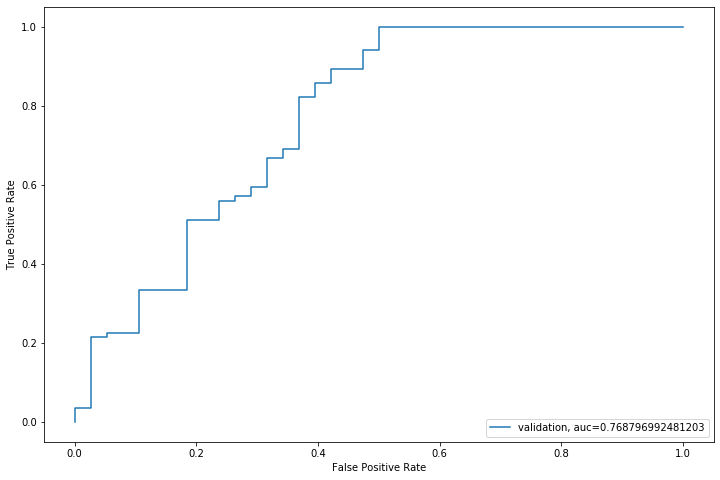

In [69]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [70]:
submission['Loan_Status'] = pred_test

In [71]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.to_csv(r'D:\Analytics Vidhya\Loan Prediction\Submission_Logistic_Regression.csv', index=False)

In [72]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

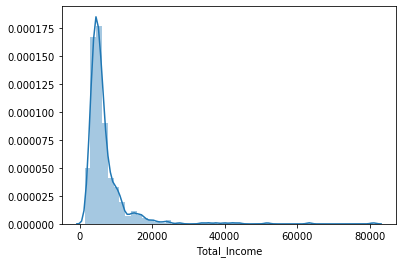

In [73]:
sns.distplot(train['Total_Income'])

In [74]:
train['Total_Income'] = np.log(train['Total_Income'])

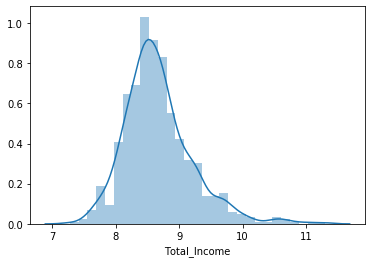

In [75]:
sns.distplot(train['Total_Income'])

In [76]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']

In [77]:
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

In [78]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

In [79]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1)

In [80]:
X = train.drop('Loan_Status', axis =1)

In [83]:
X = pd.get_dummies(X)

In [84]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy_score 0.8064516129032258

2 of kfold 5
Accuracy_score 0.7983870967741935

3 of kfold 5
Accuracy_score 0.8032786885245902

4 of kfold 5
Accuracy_score 0.7950819672131147

5 of kfold 5
Accuracy_score 0.8360655737704918


C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

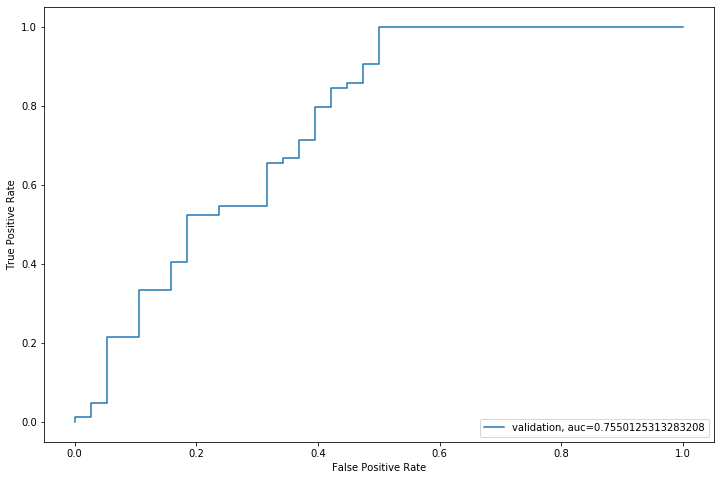

In [85]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [86]:
submission['Loan_Status'] = pred_test

In [87]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.to_csv(r'D:\Analytics Vidhya\Loan Prediction\Submission_Logistic_Regression.csv', index=False)